## Importanto bibliotecas

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Adquirindo dados

In [329]:
(x_train, y_train), (x_test,y_test) = (keras.datasets.mnist.load_data())


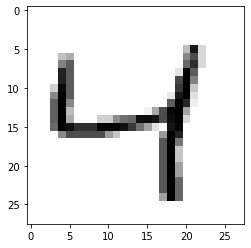

In [330]:
plt.imshow(x_train[2].reshape(28,28),cmap='binary')
plt.show()

In [331]:
class_names = ['Um','Dois','Três','Quatro','Cinco','Seis','Sete','Oito','Nove']

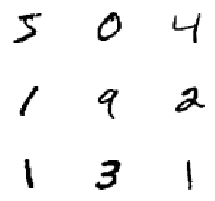

In [332]:
n_linhas = 3
n_colunas = 3
plt.figure(figsize=(n_linhas*1.2,n_colunas*1.2))
for i in range(n_linhas):
    for j in range(n_colunas): 
        index = n_colunas * i + j 
        plt.subplot(n_linhas,n_colunas,index+1)
        plt.imshow(x_train[index],cmap='binary')
        plt.axis('off')
        
plt.subplots_adjust(wspace=1,hspace=0.5)
plt.show()

## Pré-processamento

In [333]:
#convertendo pixels de 0 a 255 para 0 e 1
x_valid,x_train = x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train = y_train[:5000],y_train[5000:]
x_test = x_test/ 255

## Criando arquitetura

In [334]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [335]:
model

In [336]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_37 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [337]:
hidden1 = model.layers[1]

In [338]:
weights, biases = hidden1.get_weights()

In [339]:
weights.shape

(784, 300)

In [340]:
biases.shape

(300,)

In [341]:
hidden2 = model.layers[2]

In [342]:
weights,biases = hidden2.get_weights()

In [343]:
weights.shape

(300, 100)

In [344]:
biases.shape

(100,)

In [345]:
output = model.layers[3]

In [346]:
weights,biases = output.get_weights()

In [347]:
weights.shape

(100, 10)

In [348]:
biases.shape

(10,)

## Treinando a rede

In [349]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [350]:
history = model.fit(x_train,y_train, epochs=40 , validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5931 - acc: 0.8474 - val_loss: 0.3154 - val_acc: 0.9152
Epoch 2/40
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2906 - acc: 0.9173 - val_loss: 0.2429 - val_acc: 0.9344
Epoch 3/40
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2383 - acc: 0.9329 - val_loss: 0.2050 - val_acc: 0.9428
Epoch 4/40
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2032 - acc: 0.9425 - val_loss: 0.1769 - val_acc: 0.9526
Epoch 5/40
55000/55000 [==============================] - 5s 87us/sample - loss: 0.1770 - acc: 0.9501 - val_loss: 0.1572 - val_acc: 0.9554
Epoch 6/40
55000/55000 [==============================] - 5s 87us/sample - loss: 0.1564 - acc: 0.9559 - val_loss: 0.1438 - val_acc: 0.9612
Epoch 7/40
55000/55000 [==============================] - 5s 86us/sample - loss: 0.1399 - acc: 0.9609 - val_loss: 0.1

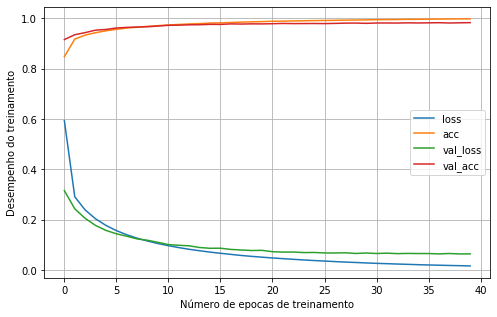

In [351]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('Número de epocas de treinamento')
plt.ylabel('Desempenho do treinamento')
plt.grid(True)
plt.show()

## Testando o modelo

In [352]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0649 - acc: 0.9805


[0.06485029282048345, 0.9805]

In [353]:
x_new = x_test[:10]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.86, 0.13, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [354]:
#Pega a posição do maior valor da linha
y_pred = np.argmax(model.predict(x_test),axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [355]:
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
print('Acurácia:',accuracy_score(y_test,y_pred))
print('Kappa:',cohen_kappa_score(y_test,y_pred))
print("Matriz de confusão:")
print(confusion_matrix(y_test,y_pred))

Acurácia: 0.9805
Kappa: 0.9783250563948687
Matriz de confusão:
[[ 970    0    1    1    1    2    1    1    2    1]
 [   0 1121    2    1    0    1    3    2    5    0]
 [   4    1 1011    0    1    0    2    6    7    0]
 [   1    1    4  989    0    4    0    4    5    2]
 [   0    0    3    0  971    0    1    1    1    5]
 [   2    0    0    7    1  873    3    1    3    2]
 [   4    3    0    1    4    3  941    0    2    0]
 [   2    1    7    2    2    0    0 1003    4    7]
 [   3    1    5    5    3    4    3    3  942    5]
 [   3    2    0    5    7    2    1    2    3  984]]


## Salvando o modelo

In [356]:
model.save('modelo_mlp.h5')

In [357]:
model = keras.models.load_model('modelo_mlp.h5')

In [358]:
np.argmax(model.predict(x_test),axis=-1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [359]:
checkpoint = keras.callbacks.ModelCheckpoint('melhor_modelo_mpl.h5',save_best_only=True)

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.0154 - acc: 0.9976 - val_loss: 0.0660 - val_acc: 0.9822
Epoch 2/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0147 - acc: 0.9978 - val_loss: 0.0650 - val_acc: 0.9814
Epoch 3/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.0139 - acc: 0.9983 - val_loss: 0.0652 - val_acc: 0.9820
Epoch 4/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.0132 - acc: 0.9984 - val_loss: 0.0645 - val_acc: 0.9820
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.0126 - acc: 0.9985 - val_loss: 0.0641 - val_acc: 0.9814
Epoch 6/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0119 - acc: 0.9987 - val_loss: 0.0651 - val_acc: 0.9822
Epoch 7/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.0114 - acc: 0.9989 - val_loss: 0.